🎨 BEAUTIFUL WAVEGUIDE STRUCTURE VISUALIZATION
3-LAYER STACK STRUCTURE:
🏗️  SiO₂ BOX (2.0 μm) - TOP LAYER
🎯 Poly-Si (0.1-3.0 μm) - MIDDLE LAYER
🏔️  Si Substrate (5.0 μm) - BOTTOM LAYER
🔗 Cu Waveguides (3.0 μm) - On top of SiO₂

1. 🖼️  MAIN STRUCTURE OVERVIEW


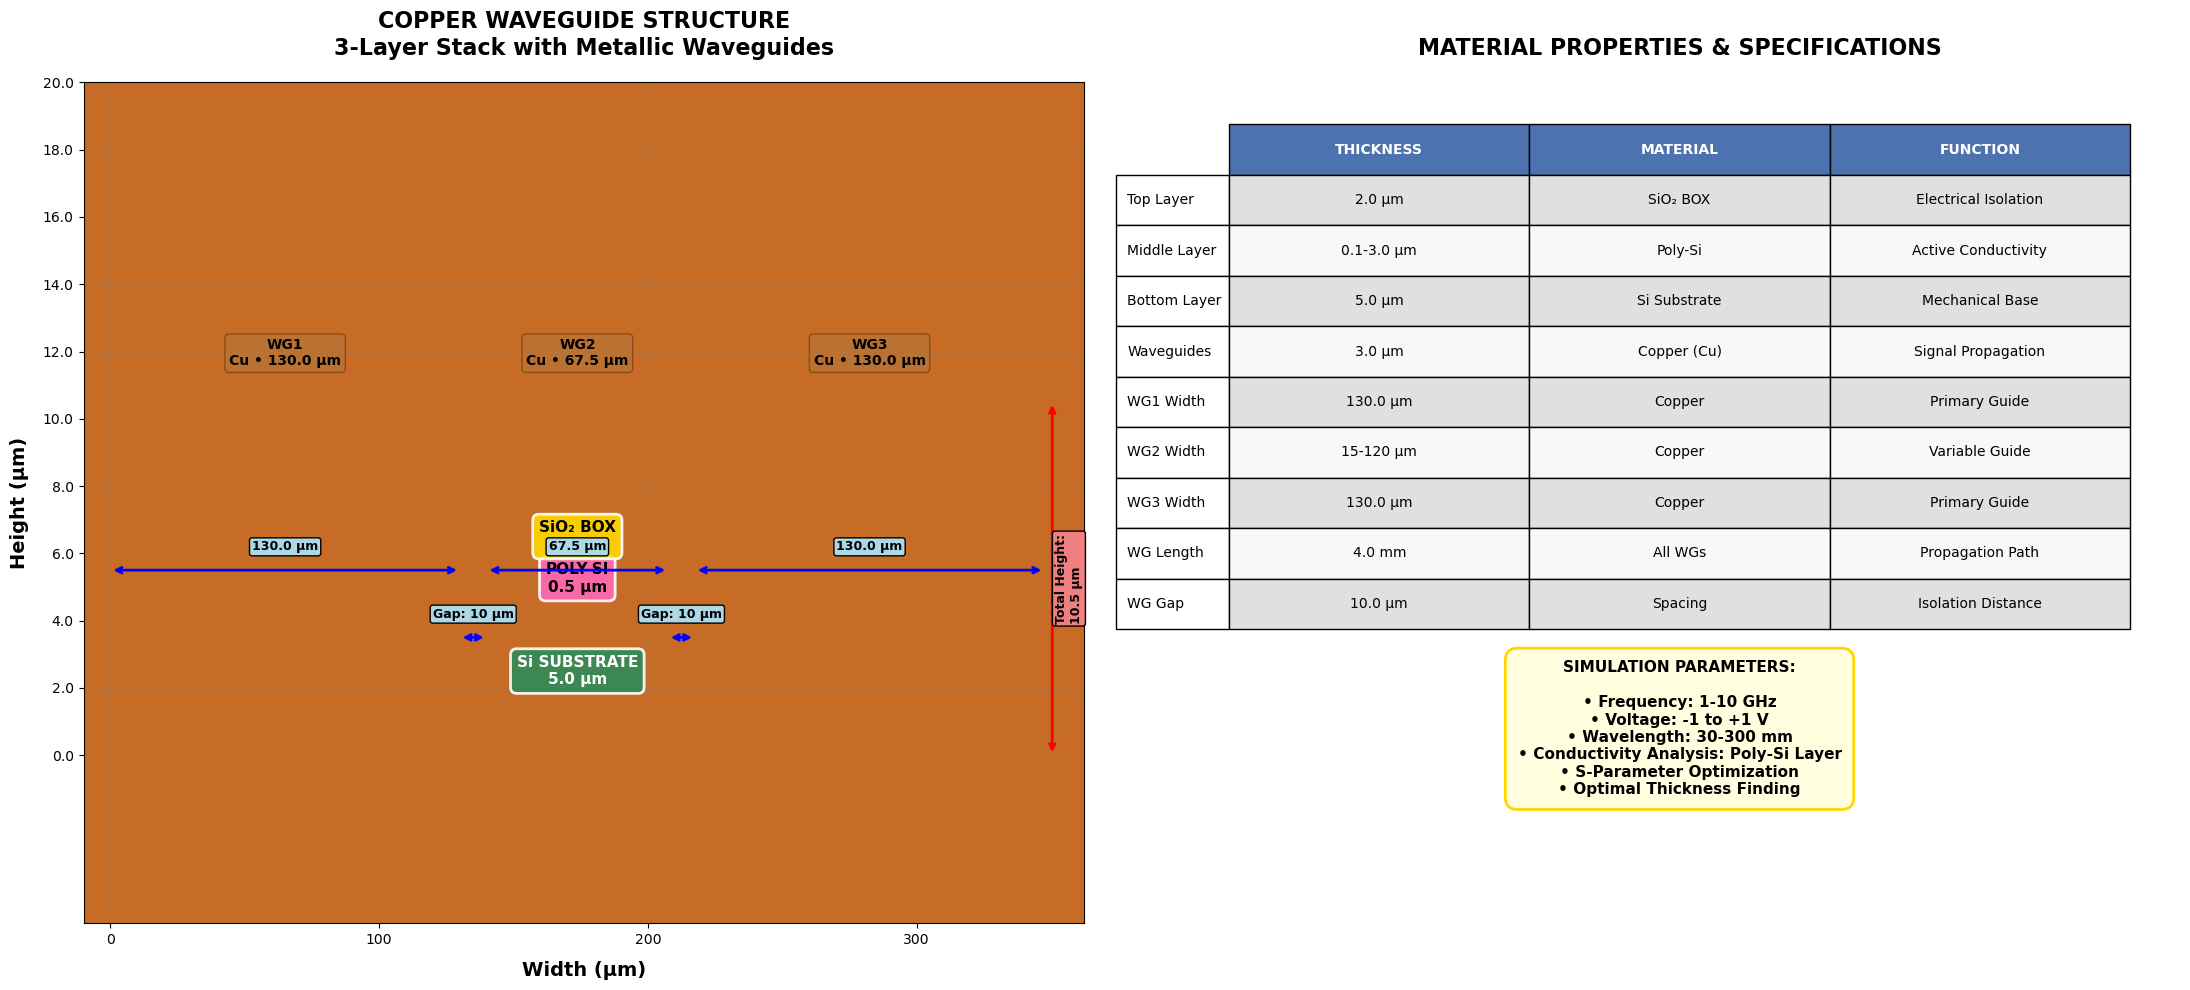


2. 📊 DETAILED CROSS-SECTIONAL VIEWS


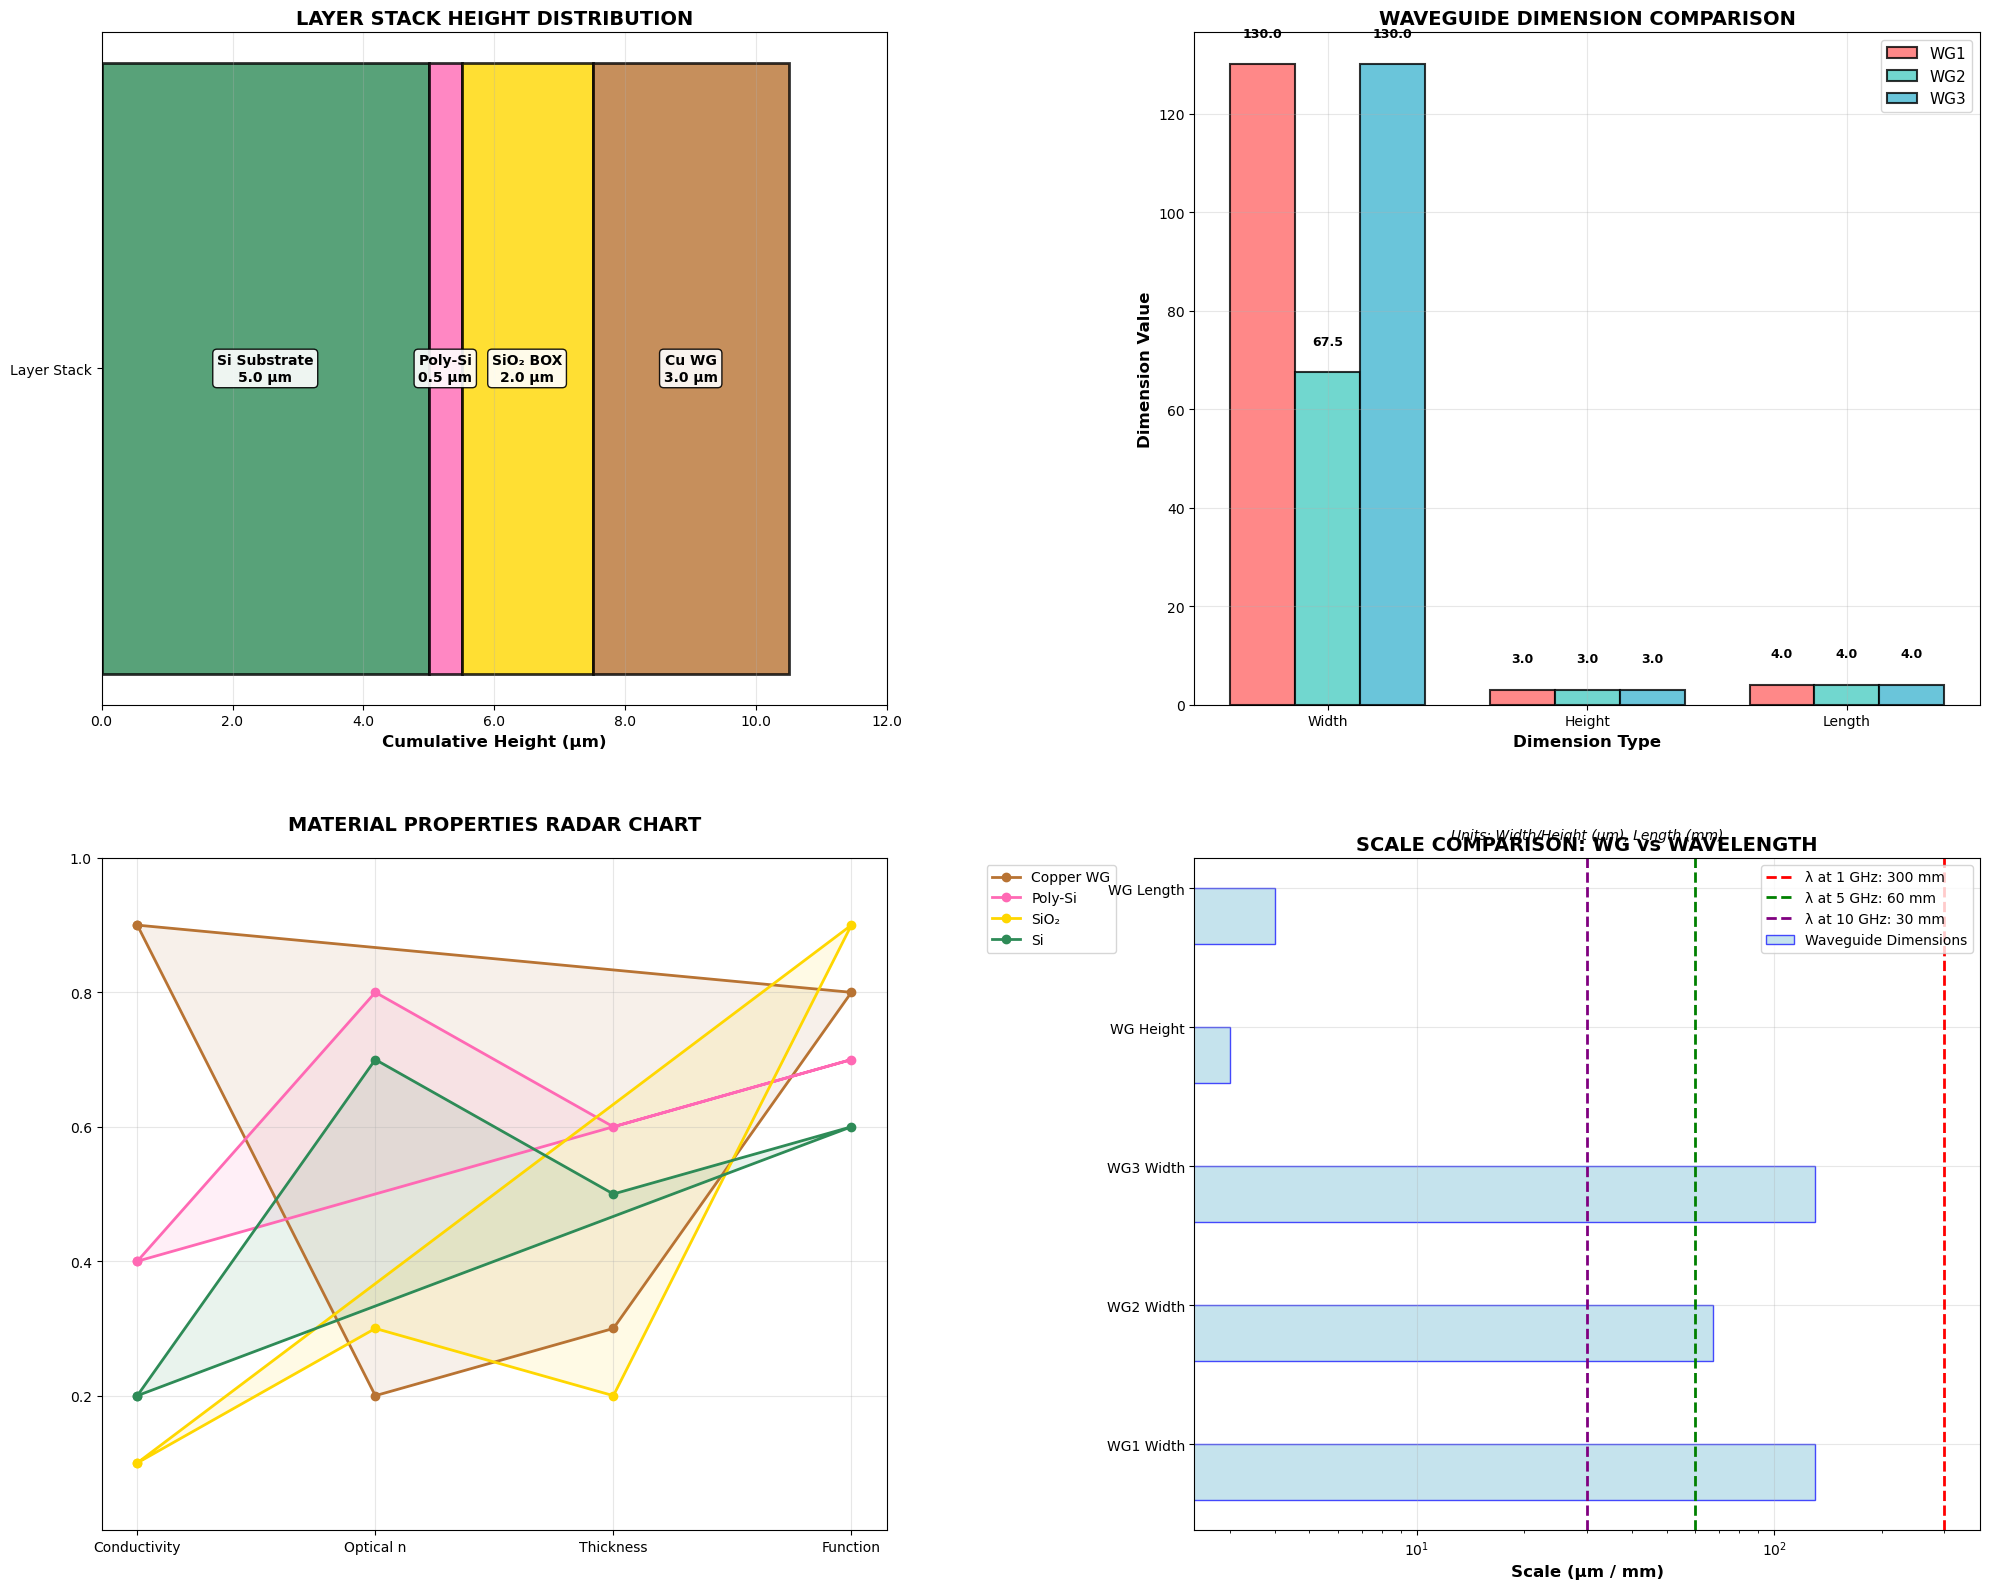


3. ⚡ OPERATING CONDITIONS


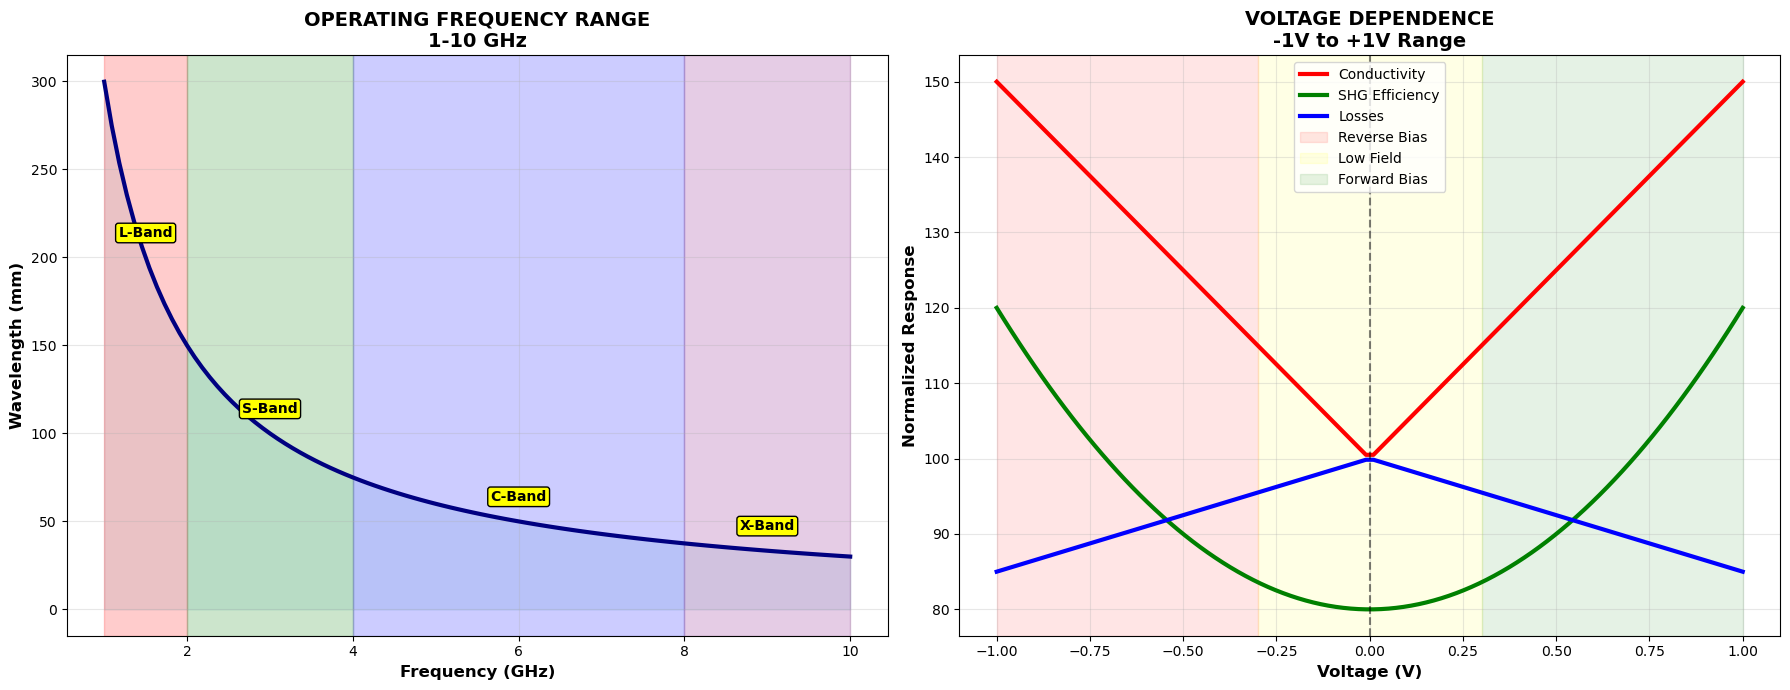


VISUALIZATION COMPLETE! 🎉
All structures drawn with proper dimensions and beautiful colors


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, epsilon_0, mu_0
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, ConnectionPatch

class BeautifulWaveguideStructures:
    def __init__(self):
        # Physical constants
        self.c = c
        self.epsilon_0 = epsilon_0
        self.mu_0 = mu_0
        
        # Copper properties
        self.sigma_cu = 5.96e7
        self.rho_cu = 1.68e-8
        
        # Material properties
        self.n_si = 3.45
        self.n_polysi = 3.50
        self.n_sio2 = 1.45
        
        # Copper Waveguide dimensions
        self.W1 = 130e-6
        self.W2 = 67.5e-6  # Middle value from range
        self.W3 = 130e-6
        self.H = 3e-6
        self.L = 4e-3
        self.gap = 10e-6
        
        # Layer thicknesses
        self.t_sio2 = 2e-6      # SiO₂ BOX - TOP LAYER
        self.t_polysi = 0.5e-6  # Poly-Si - MIDDLE LAYER
        self.t_si = 5e-6        # Si Substrate - BOTTOM LAYER

    def plot_beautiful_structure_overview(self):
        """Plot 1: Beautiful overview of the complete structure"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
        
        # Enhanced color scheme with metallic effects
        colors = {
            'sio2': '#FFD700',    # Gold - SiO₂
            'polysi': '#FF69B4',  # Hot Pink - Poly-Si
            'si': '#2E8B57',      # Sea Green - Si
            'cu_wg': '#B87333',   # Copper - Waveguides
            'metal_light': '#D2691E',
            'metal_dark': '#8B4513'
        }
        
        # Calculate dimensions
        total_width = self.W1 + self.gap + self.W2 + self.gap + self.W3
        base_height = self.t_si + self.t_polysi + self.t_sio2
        total_height = base_height + self.H
        
        # Plot 1: 3D-like perspective view
        ax1.set_facecolor('#F5F5F5')
        
        # Create gradient effects for layers
        def create_gradient_rect(x, y, width, height, base_color, ax):
            rect = FancyBboxPatch((x, y), width, height,
                                boxstyle="round,pad=0.02", 
                                facecolor=base_color,
                                edgecolor='black',
                                linewidth=3,
                                alpha=0.9)
            ax.add_patch(rect)
            
            # Add subtle shading
            shadow = FancyBboxPatch((x + width*0.02, y - height*0.02), 
                                  width*0.96, height,
                                  boxstyle="round,pad=0.02",
                                  facecolor='black',
                                  alpha=0.1)
            ax.add_patch(shadow)
        
        # Draw layers with 3D effect
        layers = [
            (0, 0, total_width, self.t_si, colors['si'], 'Si SUBSTRATE'),
            (0, self.t_si, total_width, self.t_polysi, colors['polysi'], 'POLY-SI'),
            (0, self.t_si + self.t_polysi, total_width, self.t_sio2, colors['sio2'], 'SiO₂ BOX')
        ]
        
        for x, y, w, h, color, label in layers:
            create_gradient_rect(x, y, w, h, color, ax1)
            
            # Layer labels with beautiful styling
            ax1.text(x + w/2, y + h/2, f'{label}\n{h*1e6:.1f} μm', 
                    ha='center', va='center', fontweight='bold', fontsize=11,
                    bbox=dict(boxstyle="round,pad=0.4", facecolor=color, 
                             alpha=0.9, edgecolor='white', linewidth=2),
                    color='white' if color == colors['si'] else 'black')
        
        # Draw copper waveguides with metallic effect
        wg_positions = [
            (0, self.W1, 'WG1'),
            (self.W1 + self.gap, self.W2, 'WG2'),
            (self.W1 + self.gap + self.W2 + self.gap, self.W3, 'WG3')
        ]
        
        for i, (x_start, width, label) in enumerate(wg_positions):
            # Main waveguide body
            wg_main = FancyBboxPatch((x_start, base_height), width, self.H,
                                   boxstyle="round,pad=0.01",
                                   facecolor=colors['cu_wg'],
                                   edgecolor=colors['metal_dark'],
                                   linewidth=3,
                                   alpha=0.95)
            ax1.add_patch(wg_main)
            
            # Metallic highlight
            highlight = FancyBboxPatch((x_start + width*0.1, base_height + self.H*0.7), 
                                     width*0.8, self.H*0.2,
                                     boxstyle="round,pad=0.01",
                                     facecolor=colors['metal_light'],
                                     alpha=0.6)
            ax1.add_patch(highlight)
            
            # Waveguide labels
            ax1.text(x_start + width/2, base_height + self.H + 1e-6, 
                    f'{label}\nCu • {width*1e6:.1f} μm',
                    ha='center', va='bottom', fontweight='bold', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['cu_wg'],
                             alpha=0.9, edgecolor=colors['metal_dark']))
        
        # Add dimension lines with arrows
        def add_dimension_line(ax, x1, y1, x2, y2, text, offset=0):
            # Main dimension line
            ax.annotate('', xy=(x1, y1 + offset), xytext=(x2, y2 + offset),
                       arrowprops=dict(arrowstyle='<->', color='blue', lw=2))
            # Dimension text
            ax.text((x1 + x2)/2, y1 + offset + 0.5e-6, text,
                   ha='center', va='bottom', fontweight='bold', fontsize=9,
                   bbox=dict(boxstyle="round,pad=0.2", facecolor="lightblue"))
        
        # Waveguide width dimensions
        for x_start, width, _ in wg_positions:
            add_dimension_line(ax1, x_start, base_height - 2e-6, 
                             x_start + width, base_height - 2e-6,
                             f'{width*1e6:.1f} μm')
        
        # Gap dimensions
        gap_positions = [self.W1, self.W1 + self.gap + self.W2]
        for x_pos in gap_positions:
            add_dimension_line(ax1, x_pos, base_height - 4e-6,
                             x_pos + self.gap, base_height - 4e-6,
                             f'Gap: {self.gap*1e6:.0f} μm')
        
        # Height dimension
        ax1.annotate('', xy=(total_width + 3e-6, 0), 
                    xytext=(total_width + 3e-6, base_height + self.H),
                    arrowprops=dict(arrowstyle='<->', color='red', lw=2))
        ax1.text(total_width + 4e-6, (base_height + self.H)/2, 
                f'Total Height:\n{(base_height + self.H)*1e6:.1f} μm',
                ha='left', va='center', fontweight='bold', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.2", facecolor="lightcoral"),
                rotation=90)
        
        # Configure main plot
        ax1.set_xlabel('Width (μm)', fontweight='bold', fontsize=14, labelpad=10)
        ax1.set_ylabel('Height (μm)', fontweight='bold', fontsize=14, labelpad=10)
        ax1.set_title('COPPER WAVEGUIDE STRUCTURE\n3-Layer Stack with Metallic Waveguides', 
                     fontweight='bold', fontsize=16, pad=20)
        ax1.grid(True, alpha=0.2, linestyle='-', color='gray')
        
        # Set axis limits with nice margins
        ax1.set_xlim(-10e-6, total_width + 15e-6)
        ax1.set_ylim(-5e-6, total_height + 5e-6)
        
        # Convert axes to micrometers
        x_ticks = np.arange(0, total_width + 50e-6, 100e-6)
        ax1.set_xticks(x_ticks)
        ax1.set_xticklabels([f'{x*1e6:.0f}' for x in x_ticks])
        
        y_ticks = np.arange(0, total_height + 10e-6, 2e-6)
        ax1.set_yticks(y_ticks)
        ax1.set_yticklabels([f'{y*1e6:.1f}' for y in y_ticks])
        
        # Plot 2: Material properties and specifications
        ax2.axis('off')
        ax2.set_title('MATERIAL PROPERTIES & SPECIFICATIONS', 
                     fontweight='bold', fontsize=16, pad=20)
        
        # Create beautiful specification table
        specs = [
            ['STRUCTURE', 'THICKNESS', 'MATERIAL', 'FUNCTION'],
            ['Top Layer', '2.0 μm', 'SiO₂ BOX', 'Electrical Isolation'],
            ['Middle Layer', '0.1-3.0 μm', 'Poly-Si', 'Active Conductivity'],
            ['Bottom Layer', '5.0 μm', 'Si Substrate', 'Mechanical Base'],
            ['Waveguides', '3.0 μm', 'Copper (Cu)', 'Signal Propagation'],
            ['WG1 Width', '130.0 μm', 'Copper', 'Primary Guide'],
            ['WG2 Width', '15-120 μm', 'Copper', 'Variable Guide'],
            ['WG3 Width', '130.0 μm', 'Copper', 'Primary Guide'],
            ['WG Length', '4.0 mm', 'All WGs', 'Propagation Path'],
            ['WG Gap', '10.0 μm', 'Spacing', 'Isolation Distance']
        ]
        
        # Create table with colors
        table = ax2.table(cellText=[row[1:] for row in specs[1:]],
                         rowLabels=[row[0] for row in specs[1:]],
                         colLabels=specs[0][1:],
                         cellLoc='center',
                         loc='center',
                         bbox=[0.05, 0.35, 0.9, 0.6])
        
        # Style the table
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 2.0)
        
        # Color the header
        for i in range(len(specs[0][1:])):
            table[(0, i)].set_facecolor('#4C72B0')
            table[(0, i)].set_text_props(weight='bold', color='white')
        
        # Color alternating rows
        for i in range(1, len(specs)):
            for j in range(len(specs[0][1:])):
                if i % 2 == 1:
                    table[(i, j)].set_facecolor('#E0E0E0')
                else:
                    table[(i, j)].set_facecolor('#F8F8F8')
        
        # Add simulation parameters
        sim_params = (
            'SIMULATION PARAMETERS:\n\n'
            '• Frequency: 1-10 GHz\n'
            '• Voltage: -1 to +1 V\n'
            '• Wavelength: 30-300 mm\n'
            '• Conductivity Analysis: Poly-Si Layer\n'
            '• S-Parameter Optimization\n'
            '• Optimal Thickness Finding'
        )
        
        ax2.text(0.5, 0.15, sim_params, transform=ax2.transAxes,
                ha='center', va='bottom', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.8", facecolor="lightyellow",
                         edgecolor="gold", linewidth=2))
        
        plt.tight_layout()
        plt.show()

    def plot_detailed_cross_sections(self):
        """Plot 2: Detailed cross-sectional views"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
        
        colors = {
            'sio2': '#FFD700', 'polysi': '#FF69B4', 
            'si': '#2E8B57', 'cu_wg': '#B87333'
        }
        
        total_width = self.W1 + self.gap + self.W2 + self.gap + self.W3
        base_height = self.t_si + self.t_polysi + self.t_sio2
        
        # Plot 1: Layer stack visualization
        layers = [
            (self.t_si, 'Si Substrate\n5.0 μm', colors['si']),
            (self.t_polysi, 'Poly-Si\n0.5 μm', colors['polysi']),
            (self.t_sio2, 'SiO₂ BOX\n2.0 μm', colors['sio2']),
            (self.H, 'Cu WG\n3.0 μm', colors['cu_wg'])
        ]
        
        y_pos = 0
        for thickness, label, color in layers:
            bar = ax1.barh(['Layer Stack'], thickness, left=y_pos, 
                          color=color, alpha=0.8, edgecolor='black', linewidth=2,
                          height=0.6)
            
            # Label in the middle of each layer
            ax1.text(y_pos + thickness/2, 0, label, 
                    ha='center', va='center', fontweight='bold', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))
            y_pos += thickness
        
        ax1.set_xlabel('Cumulative Height (μm)', fontweight='bold', fontsize=12)
        ax1.set_title('LAYER STACK HEIGHT DISTRIBUTION', 
                     fontweight='bold', fontsize=14)
        ax1.grid(True, alpha=0.3, axis='x')
        ax1.set_xticks(np.arange(0, y_pos + 2e-6, 2e-6))
        ax1.set_xticklabels([f'{x*1e6:.1f}' for x in np.arange(0, y_pos + 2e-6, 2e-6)])
        
        # Plot 2: Waveguide dimension comparison
        wg_data = [
            (self.W1, self.H, self.L, 'WG1', '#FF6B6B'),
            (self.W2, self.H, self.L, 'WG2', '#4ECDC4'),
            (self.W3, self.H, self.L, 'WG3', '#45B7D1')
        ]
        
        dimensions = ['Width', 'Height', 'Length']
        x_pos = np.arange(len(dimensions))
        width = 0.25
        
        for i, (wg_width, wg_height, wg_length, label, color) in enumerate(wg_data):
            values = [wg_width*1e6, wg_height*1e6, wg_length*1e3]
            offset = (i - 1) * width
            bars = ax2.bar(x_pos + offset, values, width, label=label, 
                          color=color, alpha=0.8, edgecolor='black', linewidth=1.5)
            
            # Add value labels
            for bar, value in zip(bars, values):
                ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                        f'{value:.1f}', ha='center', va='bottom', 
                        fontweight='bold', fontsize=9)
        
        ax2.set_xlabel('Dimension Type', fontweight='bold', fontsize=12)
        ax2.set_ylabel('Dimension Value', fontweight='bold', fontsize=12)
        ax2.set_title('WAVEGUIDE DIMENSION COMPARISON', 
                     fontweight='bold', fontsize=14)
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels(dimensions)
        ax2.legend(fontsize=11)
        ax2.grid(True, alpha=0.3)
        ax2.text(0.5, -0.2, 'Units: Width/Height (μm), Length (mm)', 
                transform=ax2.transAxes, ha='center', fontstyle='italic')
        
        # Plot 3: Material property radar chart
        materials = ['Copper WG', 'Poly-Si', 'SiO₂', 'Si']
        properties = ['Conductivity', 'Optical n', 'Thickness', 'Function']
        
        # Normalized values for radar chart
        values = np.array([
            [0.9, 0.2, 0.3, 0.8],  # Copper
            [0.4, 0.8, 0.6, 0.7],  # Poly-Si
            [0.1, 0.3, 0.2, 0.9],  # SiO₂
            [0.2, 0.7, 0.5, 0.6]   # Si
        ])
        
        angles = np.linspace(0, 2*np.pi, len(properties), endpoint=False).tolist()
        angles += angles[:1]  # Complete the circle
        
        for i, (material, color) in enumerate(zip(materials, 
                                                ['#B87333', '#FF69B4', '#FFD700', '#2E8B57'])):
            material_values = values[i].tolist()
            material_values += material_values[:1]  # Complete the circle
            
            ax3.plot(angles, material_values, 'o-', linewidth=2, label=material,
                    color=color, markersize=6)
            ax3.fill(angles, material_values, alpha=0.1, color=color)
        
        ax3.set_xticks(angles[:-1])
        ax3.set_xticklabels(properties, fontsize=10)
        ax3.set_ylim(0, 1)
        ax3.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
        ax3.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'])
        ax3.set_title('MATERIAL PROPERTIES RADAR CHART', 
                     fontweight='bold', fontsize=14, pad=20)
        ax3.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=10)
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: Scale comparison
        wavelengths_mm = [self.c/f * 1000 for f in [1e9, 5e9, 10e9]]
        wg_dimensions = [self.W1*1e6, self.W2*1e6, self.W3*1e6, self.H*1e6, self.L*1e3]
        wg_labels = ['WG1 Width', 'WG2 Width', 'WG3 Width', 'WG Height', 'WG Length']
        
        # Create comparison bars
        y_pos = np.arange(len(wg_labels))
        ax4.barh(y_pos - 0.2, wg_dimensions, 0.4, label='Waveguide Dimensions', 
                color='lightblue', alpha=0.7, edgecolor='blue')
        
        # Add wavelength references
        for i, wavelength in enumerate(wavelengths_mm):
            ax4.axvline(wavelength, color=['red', 'green', 'purple'][i], 
                       linestyle='--', linewidth=2,
                       label=f'λ at {[1, 5, 10][i]} GHz: {wavelength:.0f} mm')
        
        ax4.set_xlabel('Scale (μm / mm)', fontweight='bold', fontsize=12)
        ax4.set_yticks(y_pos)
        ax4.set_yticklabels(wg_labels)
        ax4.set_title('SCALE COMPARISON: WG vs WAVELENGTH', 
                     fontweight='bold', fontsize=14)
        ax4.legend(fontsize=10)
        ax4.grid(True, alpha=0.3)
        ax4.set_xscale('log')
        
        plt.tight_layout()
        plt.show()

    def plot_operating_conditions(self):
        """Plot 3: Operating conditions and parameter ranges"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: Frequency and wavelength ranges
        freq_ghz = np.linspace(1, 10, 100)
        wavelengths_mm = [self.c/(f*1e9)*1000 for f in freq_ghz]
        
        ax1.plot(freq_ghz, wavelengths_mm, 'navy', linewidth=3)
        ax1.fill_between(freq_ghz, wavelengths_mm, alpha=0.3, color='lightblue')
        ax1.set_xlabel('Frequency (GHz)', fontweight='bold', fontsize=12)
        ax1.set_ylabel('Wavelength (mm)', fontweight='bold', fontsize=12)
        ax1.set_title('OPERATING FREQUENCY RANGE\n1-10 GHz', 
                     fontweight='bold', fontsize=14)
        ax1.grid(True, alpha=0.3)
        
        # Add frequency band annotations
        bands = [(1, 2, 'L-Band'), (2, 4, 'S-Band'), (4, 8, 'C-Band'), (8, 10, 'X-Band')]
        for low, high, band in bands:
            mid_freq = (low + high) / 2
            wavelength = self.c/(mid_freq*1e9)*1000
            ax1.annotate(band, xy=(mid_freq, wavelength), 
                        xytext=(mid_freq, wavelength + 10),
                        ha='center', va='bottom', fontweight='bold',
                        bbox=dict(boxstyle="round,pad=0.2", facecolor="yellow"))
            ax1.axvspan(low, high, alpha=0.2, color=['red', 'green', 'blue', 'purple'][bands.index((low, high, band))])
        
        # Plot 2: Voltage and material response
        voltage = np.linspace(-1, 1, 100)
        
        # Simulated responses
        conductivity_response = 100 + 50 * np.abs(voltage)  # Linear response
        shg_response = 1 + 0.5 * voltage**2  # Quadratic for SHG
        loss_response = 2 - 0.3 * np.abs(voltage)  # Reduced loss with bias
        
        ax2.plot(voltage, conductivity_response, 'red', linewidth=3, label='Conductivity')
        ax2.plot(voltage, shg_response * 80, 'green', linewidth=3, label='SHG Efficiency')
        ax2.plot(voltage, loss_response * 50, 'blue', linewidth=3, label='Losses')
        
        ax2.set_xlabel('Voltage (V)', fontweight='bold', fontsize=12)
        ax2.set_ylabel('Normalized Response', fontweight='bold', fontsize=12)
        ax2.set_title('VOLTAGE DEPENDENCE\n-1V to +1V Range', 
                     fontweight='bold', fontsize=14)
        ax2.legend(fontsize=11)
        ax2.grid(True, alpha=0.3)
        ax2.axvline(0, color='black', linestyle='--', alpha=0.5)
        
        # Add operation regions
        ax2.axvspan(-1, -0.3, alpha=0.1, color='red', label='Reverse Bias')
        ax2.axvspan(-0.3, 0.3, alpha=0.1, color='yellow', label='Low Field')
        ax2.axvspan(0.3, 1, alpha=0.1, color='green', label='Forward Bias')
        ax2.legend(fontsize=10)
        
        plt.tight_layout()
        plt.show()

    def run_beautiful_visualization(self):
        """Run all beautiful visualizations"""
        print("🎨 BEAUTIFUL WAVEGUIDE STRUCTURE VISUALIZATION")
        print("=" * 70)
        print("3-LAYER STACK STRUCTURE:")
        print("🏗️  SiO₂ BOX (2.0 μm) - TOP LAYER")
        print("🎯 Poly-Si (0.1-3.0 μm) - MIDDLE LAYER") 
        print("🏔️  Si Substrate (5.0 μm) - BOTTOM LAYER")
        print("🔗 Cu Waveguides (3.0 μm) - On top of SiO₂")
        print("=" * 70)
        
        print("\n1. 🖼️  MAIN STRUCTURE OVERVIEW")
        self.plot_beautiful_structure_overview()
        
        print("\n2. 📊 DETAILED CROSS-SECTIONAL VIEWS")
        self.plot_detailed_cross_sections()
        
        print("\n3. ⚡ OPERATING CONDITIONS")
        self.plot_operating_conditions()
        
        print("\n" + "=" * 70)
        print("VISUALIZATION COMPLETE! 🎉")
        print("All structures drawn with proper dimensions and beautiful colors")
        print("=" * 70)

# Run the beautiful visualization
if __name__ == "__main__":
    visualizer = BeautifulWaveguideStructures()
    visualizer.run_beautiful_visualization()